In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from iaml_cw2_helpers import *

In [2]:
Xtrn_org , Ytrn_org , Xtst_org , Ytst_org = load_Q2_dataset ( )
Xtrn = Xtrn_org / 255.0
Xtst = Xtst_org / 255.0
Ytrn = Ytrn_org - 1
Ytst = Ytst_org - 1
Xmean = np.mean (Xtrn , axis=0)
Xtrn_m = Xtrn -Xmean ; Xtst_m = Xtst - Xmean # Mean−no rmali s e d v e r s i o n s
print(Xtrn.shape)
print(Ytst.shape)

(7800, 784)
(2600,)


In [3]:
# Q2.1
def iaml212cw2_q2_1():
    print("Xtrn min:", np.min(Xtrn),"Xtrn max:", np.max(Xtrn), "Xtrn mean:",np.mean(Xtrn),"Xtrn std:" , np.std(Xtrn))
    print("Xtst min:", np.min(Xtst),"Xtst max:", np.max(Xtst), "Xtst mean:",np.mean(Xtst),"Xtrst std:" , np.std(Xtst))
    plt.subplot(1,2,1)
    plt.title('First instance; class='+str(Ytrn[0]))
    plt.imshow(Xtrn[0].reshape((28, 28)), cmap='gray_r')
    plt.subplot(1,2,2)
    plt.title('Second instance; class='+str(Ytrn[1]))
    plt.imshow(Xtrn[1].reshape((28, 28)), cmap='gray_r')

Xtrn min: 0.0 Xtrn max: 1.0 Xtrn mean: 0.17737719254368406 Xtrn std: 0.3349824841708448
Xtst min: 0.0 Xtst max: 1.0 Xtst mean: 0.17563382275987316 Xtrst std: 0.3334625647782058


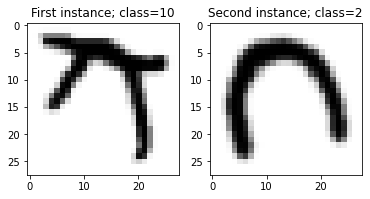

In [4]:
iaml212cw2_q2_1()

In [7]:
# Q2.3
from sklearn.cluster import KMeans
def iaml212cw2_q2_3():
    class0 = []
    class5 = [] 
    class8 = []
    for i in range(len(Ytrn)):
        if Ytrn[i]==0:
            class0.append(Xtrn[i])
        if Ytrn[i]==5:
            class5.append(Xtrn[i])
        if Ytrn[i]==8:
            class8.append(Xtrn[i])
    kmeans_0_3 = KMeans(n_clusters=3, random_state=0)  
    kmeans_0_3.fit(class0)
    kmeans_0_5 = KMeans(n_clusters=5, random_state=0)  
    kmeans_0_5.fit(class0)
    kmeans_5_3 = KMeans(n_clusters=3, random_state=0)  
    kmeans_5_3.fit(class5)
    kmeans_5_5 = KMeans(n_clusters=5, random_state=0)  
    kmeans_5_5.fit(class5)
    kmeans_8_3 = KMeans(n_clusters=3, random_state=0)  
    kmeans_8_3.fit(class8)
    kmeans_8_5 = KMeans(n_clusters=5, random_state=0)  
    kmeans_8_5.fit(class8)
    plt.figure(figsize=(7, 7))
    plt.suptitle('K=3')
    for i in range(3):
        plt.subplot(3,3,i+1)
        plt.imshow(kmeans_0_3.cluster_centers_[i].reshape((28, 28)), cmap='gray_r')
        plt.subplot(3,3,i+4)
        plt.imshow(kmeans_5_3.cluster_centers_[i].reshape((28, 28)), cmap='gray_r')
        plt.subplot(3,3,i+7)
        plt.imshow(kmeans_8_3.cluster_centers_[i].reshape((28, 28)), cmap='gray_r')
        
    plt.show()
    plt.suptitle('k=5')
    for i in range(5):
        
        plt.subplot(3,5,i+1)
        plt.imshow(kmeans_0_5.cluster_centers_[i].reshape((28, 28)), cmap='gray_r')
        plt.subplot(3,5,i+6)
        plt.imshow(kmeans_5_5.cluster_centers_[i].reshape((28, 28)), cmap='gray_r')
        plt.subplot(3,5,i+11)
        plt.imshow(kmeans_8_5.cluster_centers_[i].reshape((28, 28)), cmap='gray_r')
    plt.show()

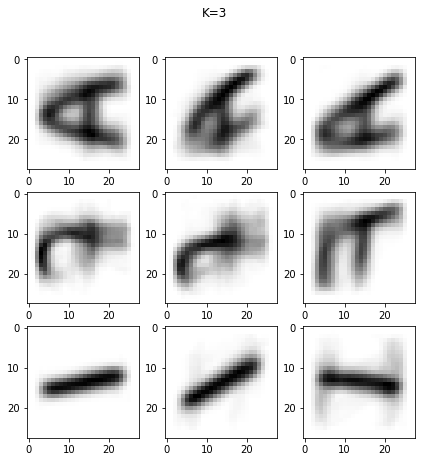

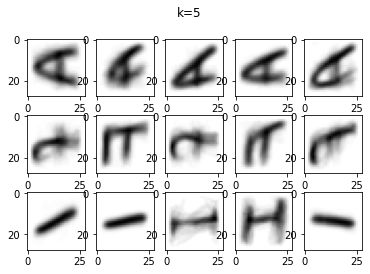

In [8]:
iaml212cw2_q2_3()

In [5]:
from sklearn.linear_model import LogisticRegression
def iaml212cw2_q2_5():
    lr = LogisticRegression(max_iter=1000, random_state=0)
    lr.fit(Xtrn_m, Ytrn)
    print('Classification accuracy on training set: ', (lr.score(Xtrn_m, Ytrn)))
    print('Classification accuracy on test set: ', (lr.score(Xtst_m, Ytst)))
    score_class=[]
    wrong_numbers=[]
    for j in range (25):
        tempx=[]
        ys=[]
        for i in range(len(Ytst)):
            if Ytst[i]==j:
                tempx.append(Xtst_m[i])
                ys.append(j)
        predicted = lr.predict(tempx)
        count = 0
        for i in range(len(ys)):
            if predicted[i] != ys[i]:
                count+=1
        wrong_numbers.append(count)
        score_class.append(lr.score(tempx, ys))
    for i in range(25):
        score_class[i]=(score_class[i],chr(ord('A')+i))
    for j in range(25):
        wrong_numbers[j]=(wrong_numbers[j],chr(ord('A')+j))
    wrong_numbers.sort(reverse=True)
    print(wrong_numbers)
    score_class.sort()
    print(score_class) 
    print(lr.get_params())

In [6]:
iaml212cw2_q2_5()

Classification accuracy on training set:  0.9161538461538462
Classification accuracy on test set:  0.7223076923076923
[(53, 'L'), (48, 'R'), (42, 'I'), (38, 'K'), (36, 'N'), (35, 'X'), (34, 'E'), (33, 'J'), (32, 'A'), (30, 'B'), (29, 'G'), (28, 'Q'), (27, 'U'), (27, 'H'), (26, 'V'), (26, 'S'), (25, 'Y'), (23, 'F'), (22, 'W'), (18, 'O'), (16, 'D'), (13, 'P'), (12, 'M'), (10, 'T'), (10, 'C')]
[(0.47, 'L'), (0.52, 'R'), (0.58, 'I'), (0.62, 'K'), (0.64, 'N'), (0.65, 'X'), (0.66, 'E'), (0.67, 'J'), (0.68, 'A'), (0.7, 'B'), (0.71, 'G'), (0.72, 'Q'), (0.73, 'H'), (0.73, 'U'), (0.74, 'S'), (0.74, 'V'), (0.75, 'Y'), (0.77, 'F'), (0.78, 'W'), (0.82, 'O'), (0.84, 'D'), (0.87, 'P'), (0.88, 'M'), (0.9, 'C'), (0.9, 'T')]
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [12]:
from sklearn.linear_model import LogisticRegression
def iaml212cw2_q2_6():
    #cs = np.logspace(-2, 3, 10)
#     for i in cs:
#         print('c: ', i)
#         lr_param = LogisticRegression(C=i,max_iter=1000, random_state=0)
#         lr_param.fit(Xtrn_m, Ytrn)
#         print('score ', lr_param.score(Xtst_m, Ytst))   
#from the top steps, find the range of c that makes the accuracy increase: between 0.01 and 0.4642
    step = (0.464158883361278-0.01)/10
    init_c=0.01
    for i in range(10):
        print('c: ', init_c)
        
        lr_param.fit(Xtrn_m, Ytrn)
        print('score ', lr_param.score(Xtst_m, Ytst))
        init_c+=step
#according to resuit when c = 0.055415888336127796, score = 0.752, original score is 0.722, shows a increase in performance  

In [13]:
iaml212cw2_q2_6()

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


score  0.6107692307692307


Three way to improve: 1.Hyperparameter Tuning 2. data normalization 3. increase the size of trainning set. 


In [4]:
present =[]
for i in range(25):
    count = 0
    for j in range(len(Ytrn)):
        if Ytrn[j]==i:
            count+=1
    present.append(count)
            
for i in range(25):
    present[i]=(i,chr(ord('A')+i))
present     

[(0, 'A'),
 (1, 'B'),
 (2, 'C'),
 (3, 'D'),
 (4, 'E'),
 (5, 'F'),
 (6, 'G'),
 (7, 'H'),
 (8, 'I'),
 (9, 'J'),
 (10, 'K'),
 (11, 'L'),
 (12, 'M'),
 (13, 'N'),
 (14, 'O'),
 (15, 'P'),
 (16, 'Q'),
 (17, 'R'),
 (18, 'S'),
 (19, 'T'),
 (20, 'U'),
 (21, 'V'),
 (22, 'W'),
 (23, 'X'),
 (24, 'Y')]

In [9]:
def iaml212cw2_q2_7():
    class0 = []
    for i in range(len(Ytrn)):
        if Ytrn[i]==0:
            class0.append(Xtrn_m[i])
    class0=np.asarray(class0)
    class0_mean = np.mean(class0,axis=0)
    covariance = np.cov(class0.T)
    print(covariance.shape)
    diagonal=np.diagonal(covariance)
#     for i in range(len(covariance)):
#         diagonal.append(covariance[i][i])
    print("min of covariance: ",np.min(covariance),"max of covariance: ",np.max(covariance),"mean of covariance: ", np.mean(covariance))
    print("min of diagonal: ",np.min(diagonal),"max of diagonal: ", np.max(diagonal),"mean of diagonal: ",np.mean(diagonal))
    plt.grid()
    plt.xlabel('Diagonal value')
    plt.ylabel('Frequency')
    plt.title('Diagonal value frequency')
    plt.hist([diagonal],bins=15)
    scipy.stats.multivariate_normal.pdf(class0,cov=covariance, mean=class0_mean)

(784, 784)
min of covariance:  -0.09747401775408393 max of covariance:  0.18378613679585562 mean of covariance:  0.001708791632836062
min of diagonal:  0.0 max of diagonal:  0.18378613679585562 mean of diagonal:  0.07231314807821394


LinAlgError: singular matrix

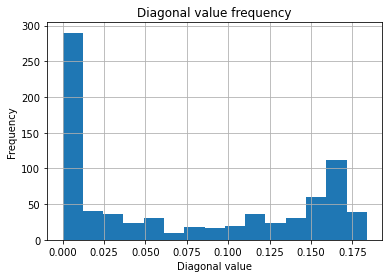

In [10]:
iaml212cw2_q2_7()

In [14]:
from sklearn.mixture import GaussianMixture
def iaml212cw2_q2_8():
    class0 = []
    for i in range(len(Ytrn)):
        if Ytrn[i]==0:
            class0.append(Xtrn_m[i])
    gm = GaussianMixture(n_components=1, covariance_type='full').fit(class0)
    print("a. first instance score",gm.score([Xtst_m[0]]))
    classes=[]
    for i in range(26):
        temp=[]
        for j in range(len(Ytrn)):
            if Ytrn[j]==i:
                temp.append(Xtrn_m[j])
        classes.append(temp)
        gm_list=[]
    for i in range(26):
        gm = GaussianMixture(n_components=1, covariance_type='full')
        gm_list.append(gm.fit(classes[i]))
    result=[]
    for i in range(len(Ytst)):
        scores=[]
        for j in range(26):
            gm=gm_list[j]
            scores.append(gm.score([Xtst_m[i]]))
        result.append(scores.index(max(scores)))
    correct=0
    for i in range(len(Ytst)):
        if result[i]==Ytst[i]:
            correct+=1
    print(correct)
    print(correct/(len(Ytst)))

In [15]:
iaml212cw2_q2_8()

a. first instance score -1712612.7436858357
1803
0.6934615384615385
